In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error


import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv("new_tesla.csv")
df.head()

,date,open,high,low,close,Adj Close,volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
df.shape

(2193, 7)

In [ ]:
df.describe()

,open,high,low,close,Adj Close,volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2193 non-null   object 
 1   open       2193 non-null   float64
 2   high       2193 non-null   float64
 3   low        2193 non-null   float64
 4   close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


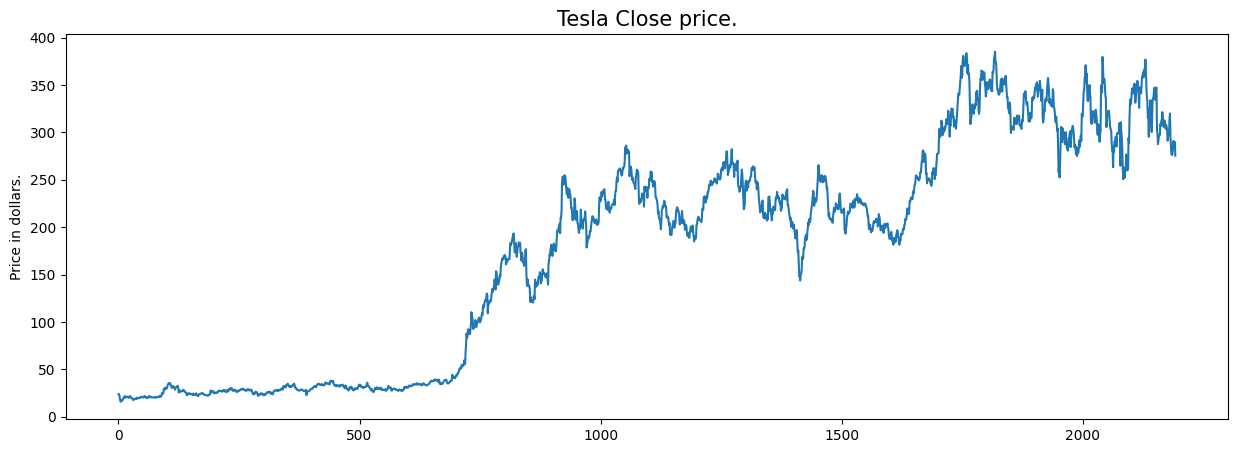

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [ ]:
df.head()

,date,open,high,low,close,Adj Close,volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
df = df.drop(['Adj Close'], axis=1)


In [ ]:
df.head()

,date,open,high,low,close,volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,6866900


In [ ]:
df.isnull().sum()


date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

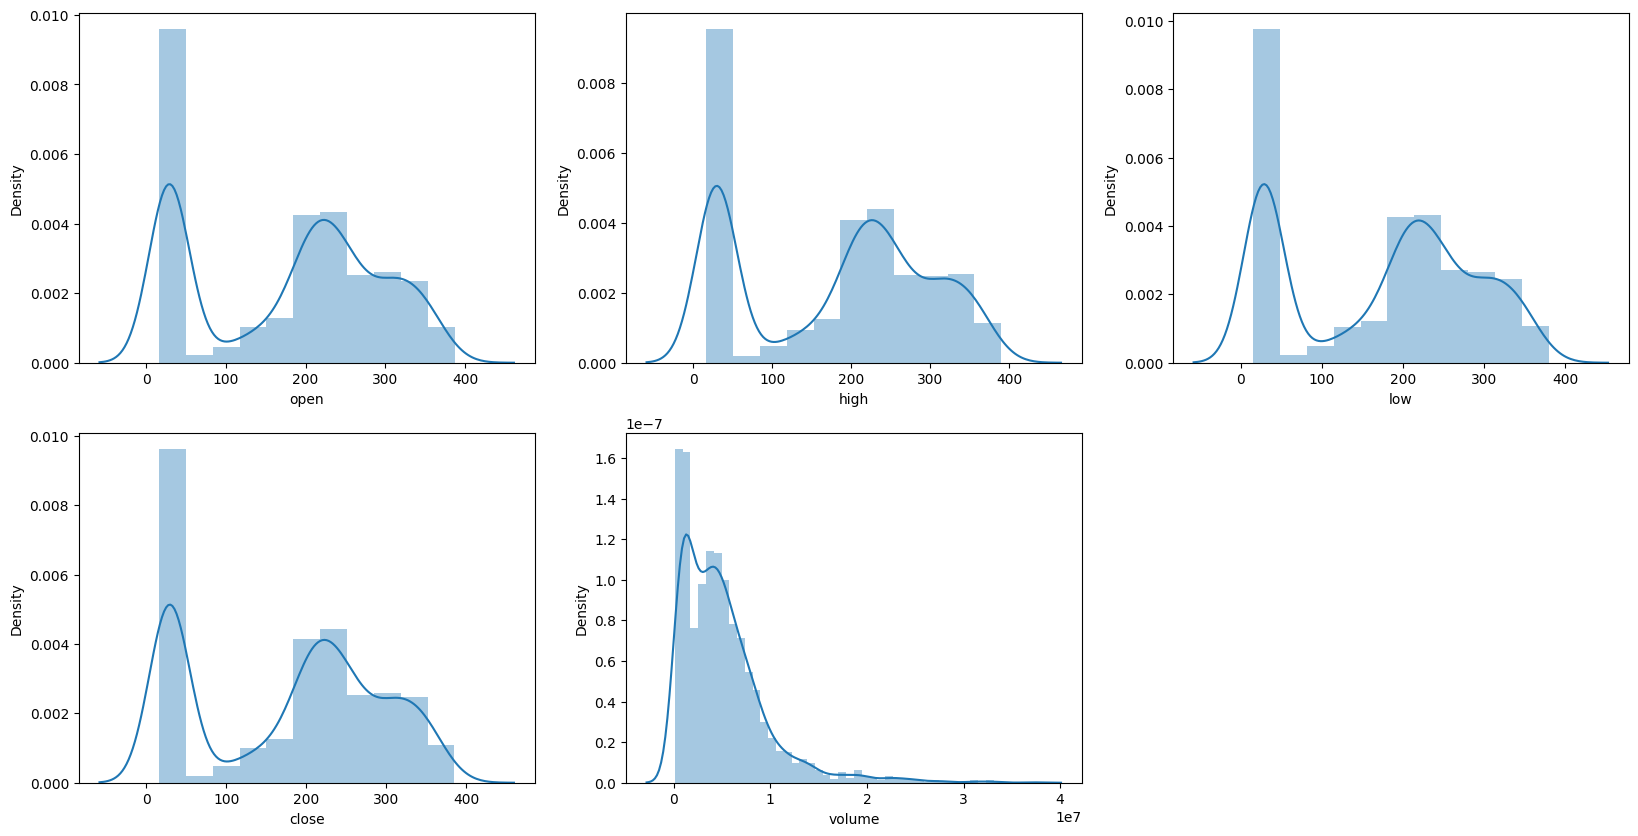

In [ ]:
features = ['open', 'high', 'low', 'close', 'volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()


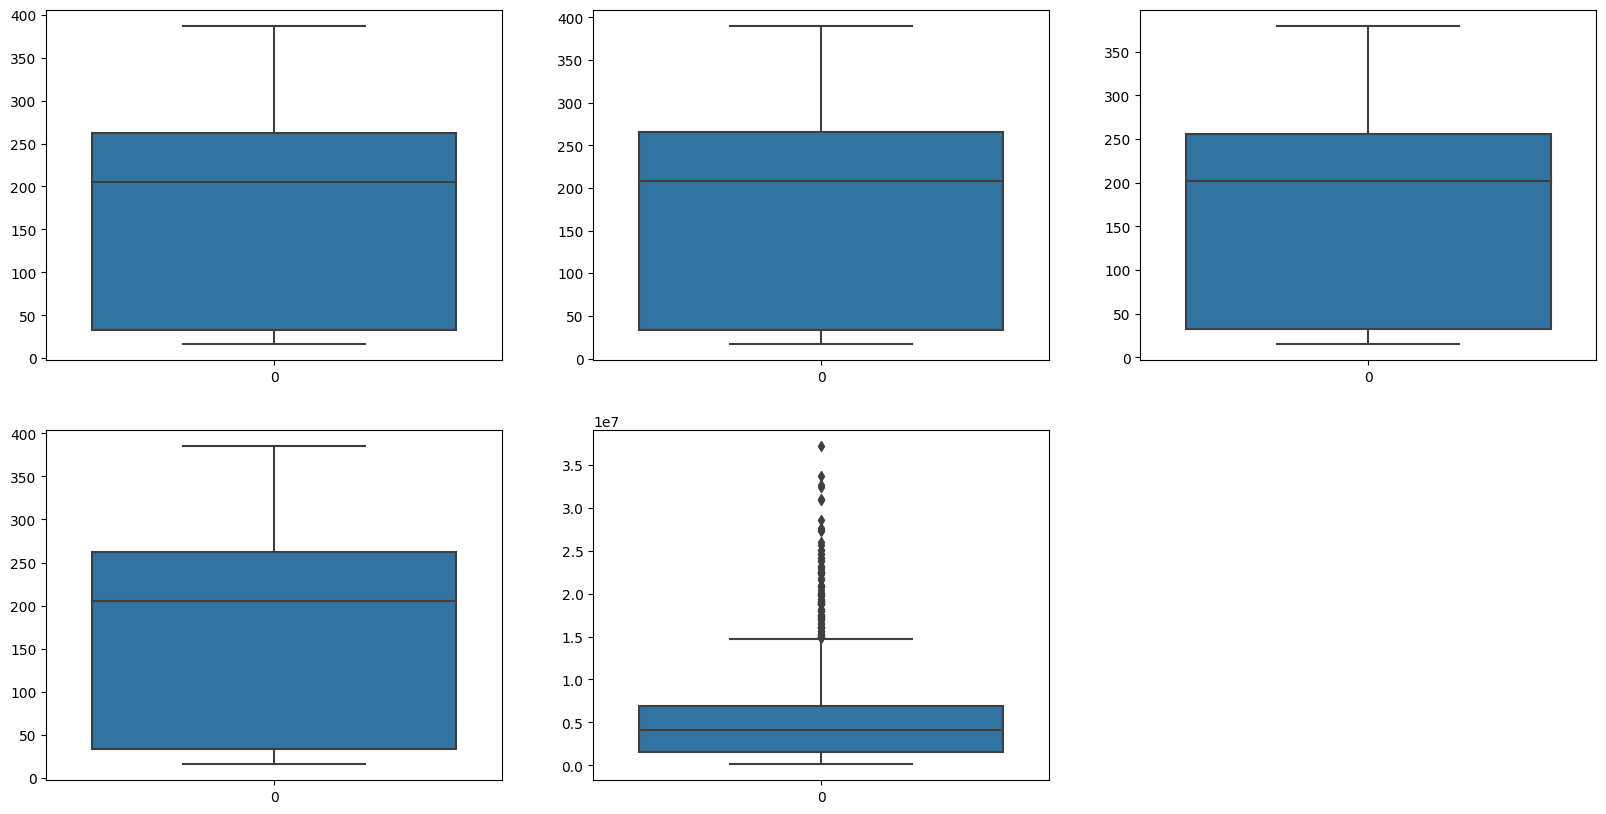

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()


In [ ]:
df['day'] = pd.DatetimeIndex(df['date']).day
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year

df.head()

,date,open,high,low,close,volume,day,month,year
0,29-06-2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,30-06-2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,01-07-2010,25.000000,25.92,20.270000,21.959999,8218800,7,1,2010
3,02-07-2010,23.000000,23.10,18.709999,19.200001,5139800,7,2,2010
4,06-07-2010,20.000000,20.00,15.830000,16.110001,6866900,7,6,2010


In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,date,open,high,low,close,volume,day,month,year,is_quarter_end
0,29-06-2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,30-06-2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,01-07-2010,25.000000,25.92,20.270000,21.959999,8218800,7,1,2010,0
3,02-07-2010,23.000000,23.10,18.709999,19.200001,5139800,7,2,2010,0
4,06-07-2010,20.000000,20.00,15.830000,16.110001,6866900,7,6,2010,1


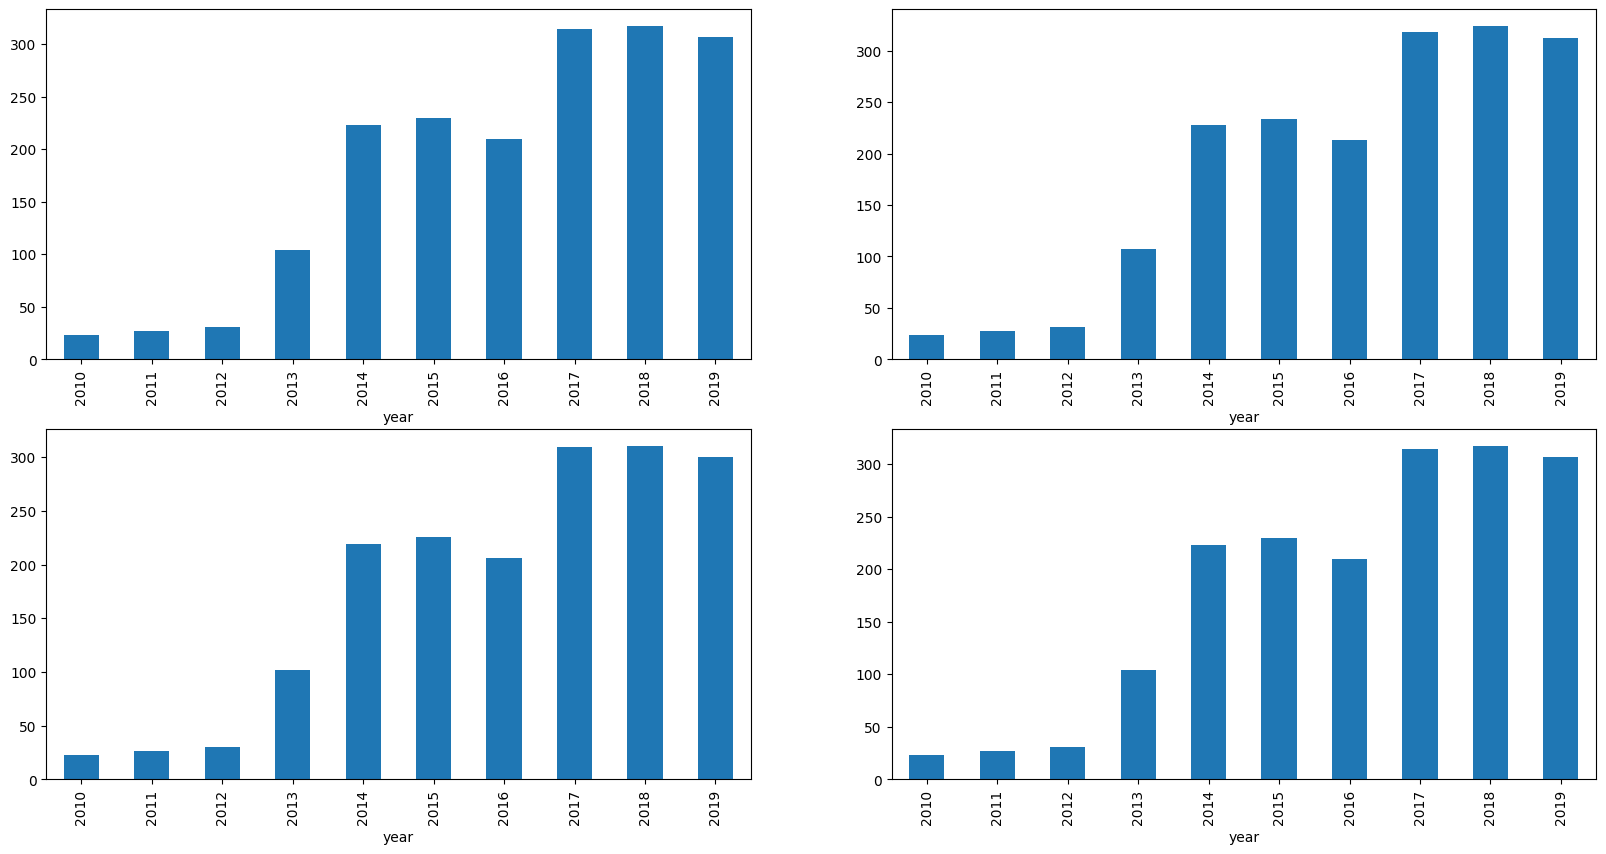

In [ ]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['open', 'high', 'low', 'close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()


In [ ]:
df.groupby('is_quarter_end').mean()

,open,high,low,close,volume,day,month,year
is_quarter_end,,,,,,,,
0,175.031003,178.137595,171.836385,175.142303,5.110435e+06,15.741581,6.134708,2014.366323
1,176.878943,179.839301,173.547073,176.646653,5.012416e+06,15.608401,7.573171,2014.280488


In [ ]:
df['open-close'] = df['open'] - df['close']
df['low-high'] = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)


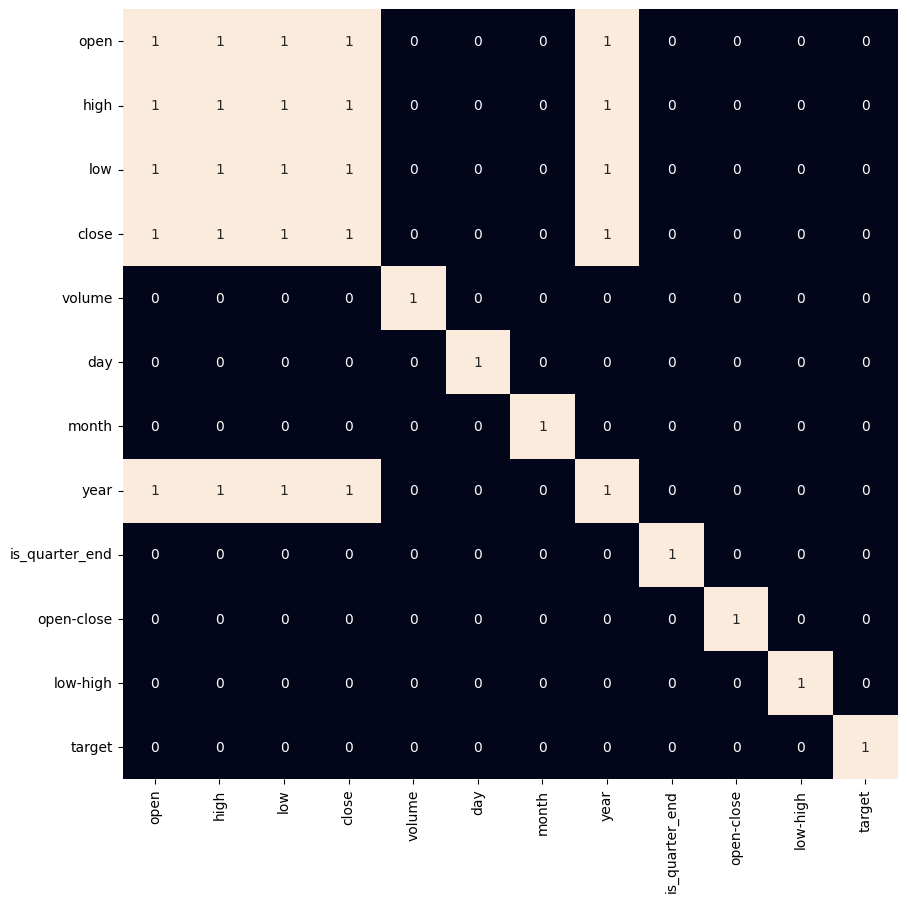

In [ ]:
plt.figure(figsize=(10, 10))


sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


In [ ]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=0)
print(X_train.shape, X_valid.shape)


(1973, 3) (220, 3)


Logistic Regression

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
Y_pred1 = model1.predict(X_valid)
cm1 = confusion_matrix(Y_valid,Y_pred1)
print(cm1)
accuracy_score(Y_valid, Y_pred1)

[[27 81]
 [24 88]]


0.5227272727272727

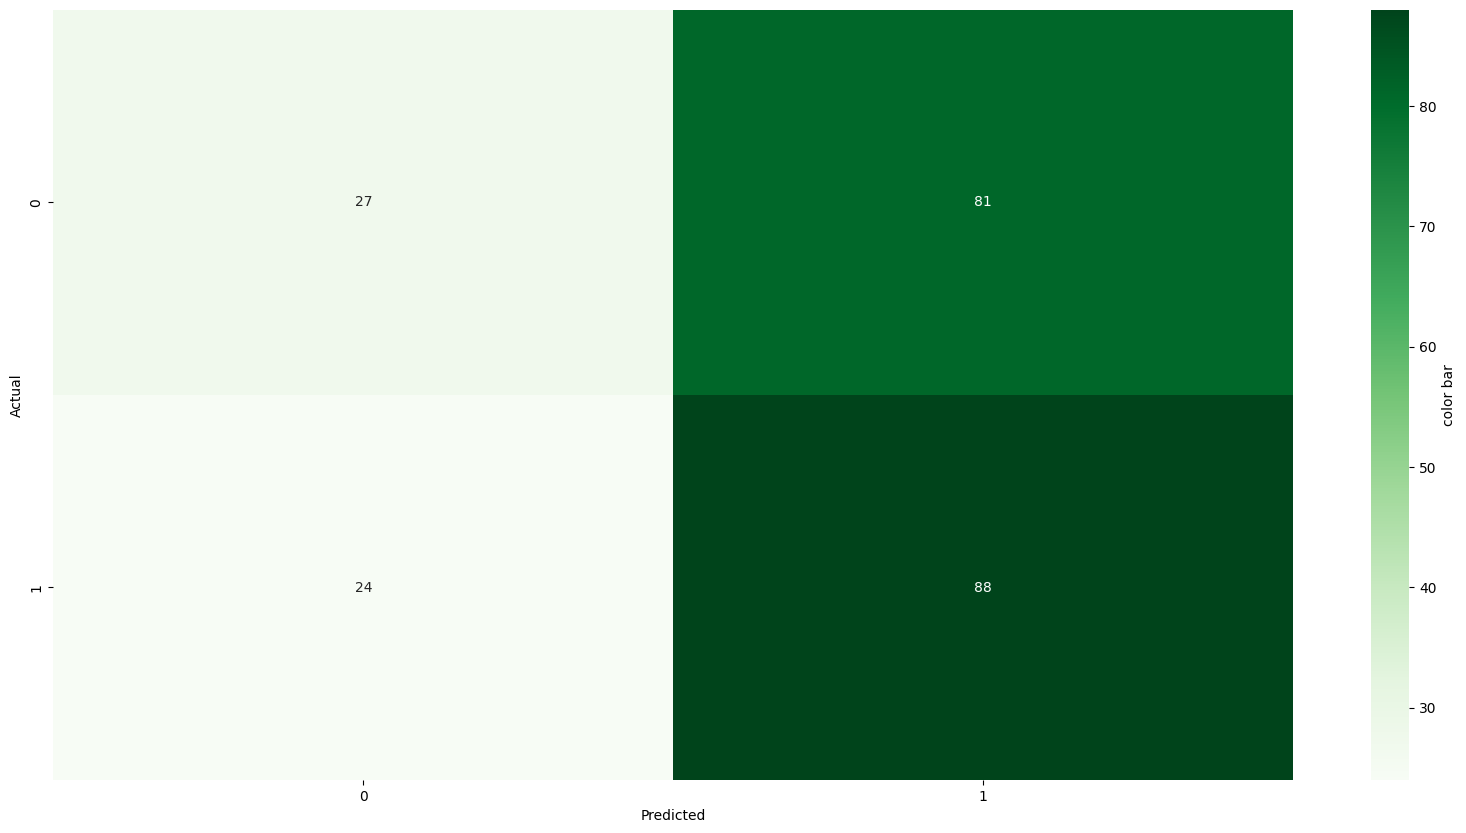

In [ ]:
sb.heatmap(cm1,cmap='Greens',annot=True,
           cbar_kws={"orientation":"vertical", "label":"color bar"},
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
Y_pred1 = model1.predict(X_valid)
mse = mean_squared_error(Y_valid, Y_pred1)
rmse = np.sqrt(mse)

Support Vector Classification

In [ ]:
model2 = SVC(kernel='poly', probability=True)
model2.fit(X_train,Y_train)
Y_pred2 = model2.predict(X_valid)
cm2 = confusion_matrix(Y_valid,Y_pred2)
print(cm2)
accuracy_score(Y_valid, Y_pred2)

[[  1 107]
 [  4 108]]


0.4954545454545455

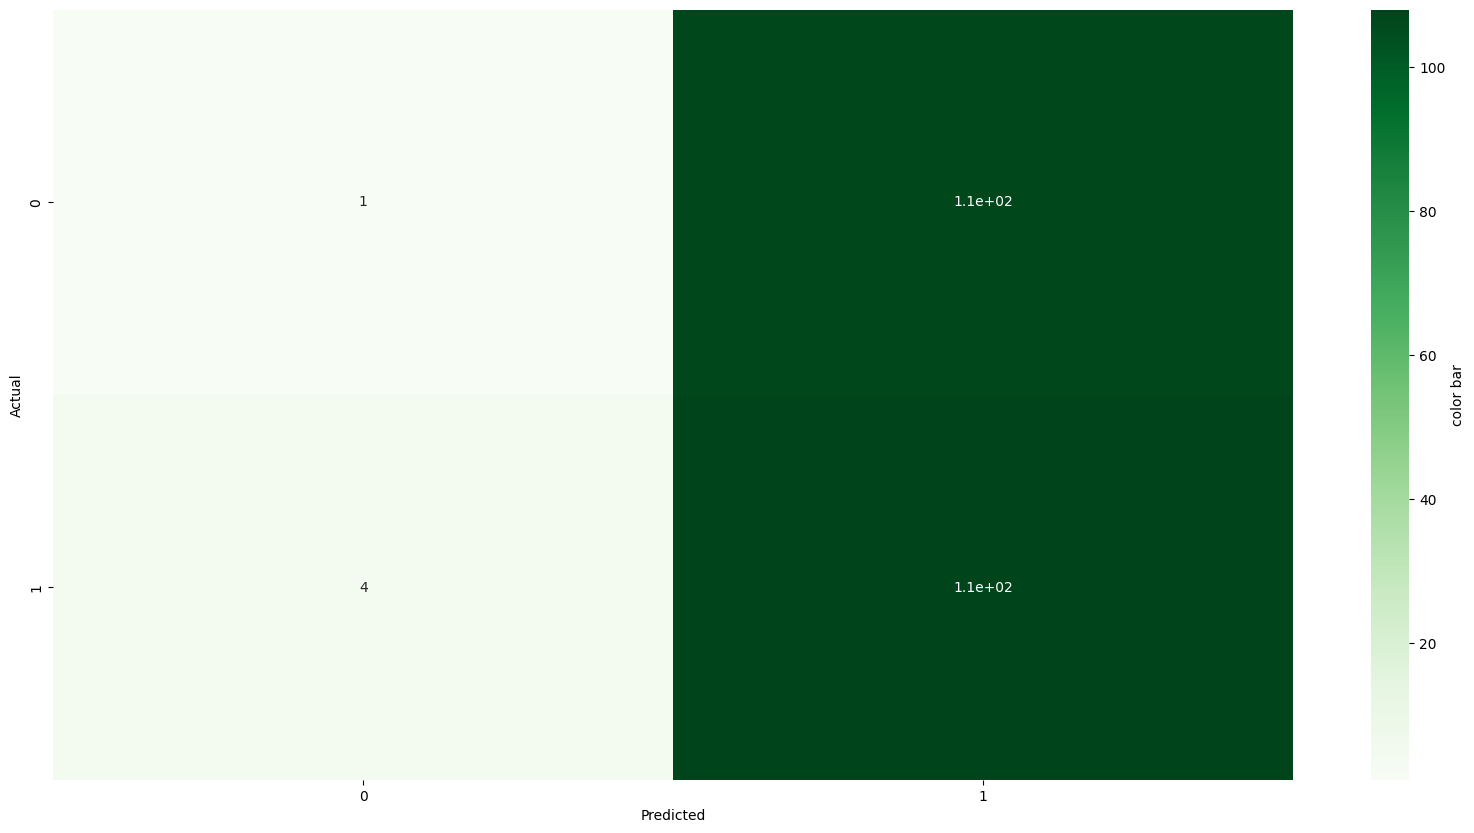

In [ ]:
sb.heatmap(cm2,cmap='Greens',annot=True,
           cbar_kws={"orientation":"vertical", "label":"color bar"},
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
Y_pred1 = model2.predict(X_valid)
mse = mean_squared_error(Y_valid, Y_pred1)
rmse = np.sqrt(mse)

XGBoost Classifier

In [ ]:
model3 = XGBClassifier()
model3.fit(X_train,Y_train)
Y_pred3 = model3.predict(X_valid)
cm3 = confusion_matrix(Y_valid,Y_pred3)
print(cm3)
accuracy_score(Y_valid, Y_pred3)

[[55 53]
 [55 57]]


0.509090909090909

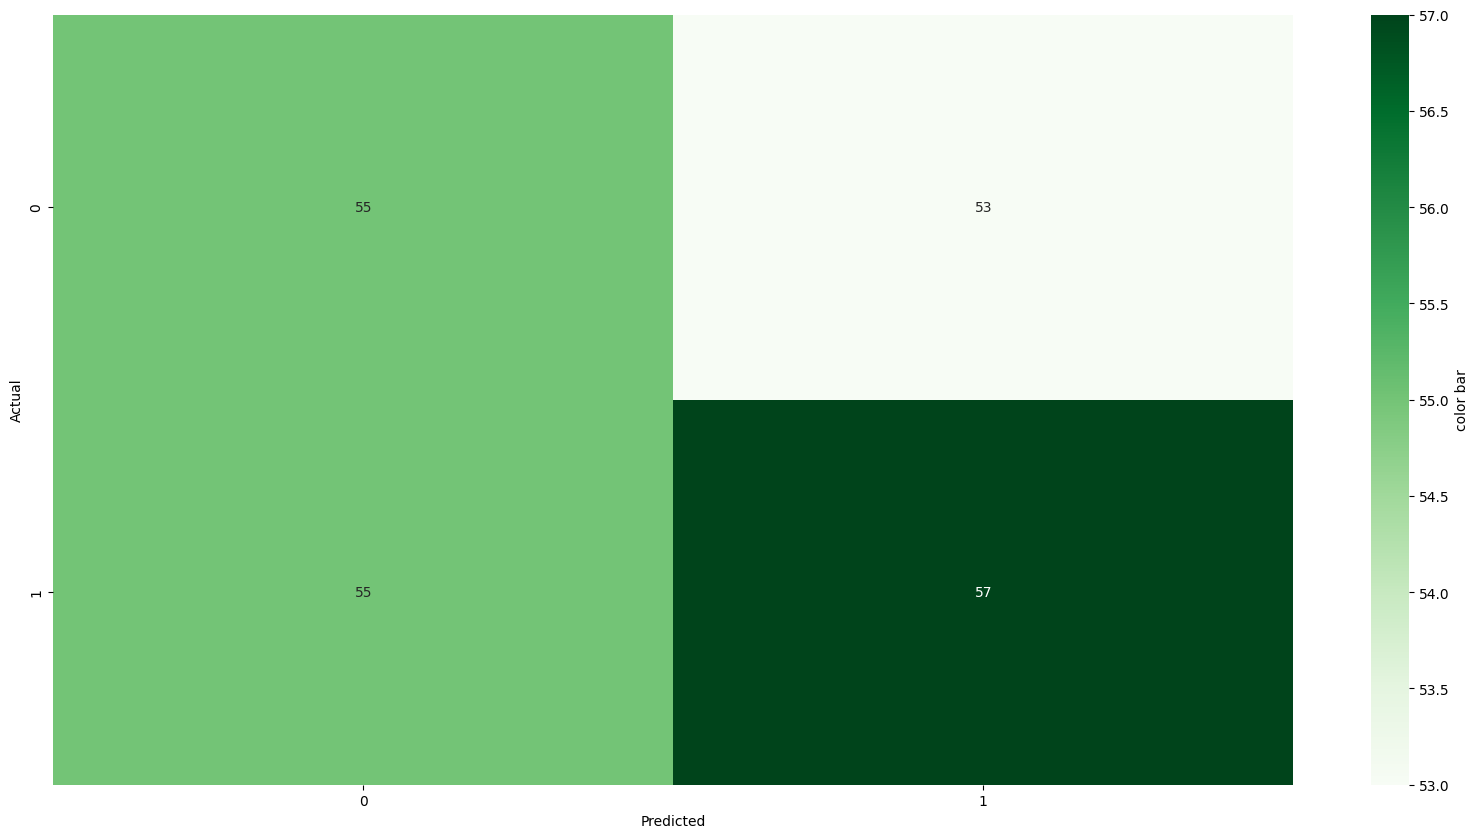

In [ ]:
sb.heatmap(cm3,cmap='Greens',annot=True,
           cbar_kws={"orientation":"vertical", "label":"color bar"},
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
Y_pred1 = model3.predict(X_valid)
mse = mean_squared_error(Y_valid, Y_pred1)
rmse = np.sqrt(mse)

Decision Tree

In [ ]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(random_state=0)

In [ ]:

model4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model4.fit(X_train,Y_train)
Y_pred4 = model4.predict(X_valid)
cm4 = confusion_matrix(Y_valid , Y_pred4)
print(cm4)
accuracy_score(Y_valid, Y_pred4)


[[56 52]
 [51 61]]


0.5318181818181819

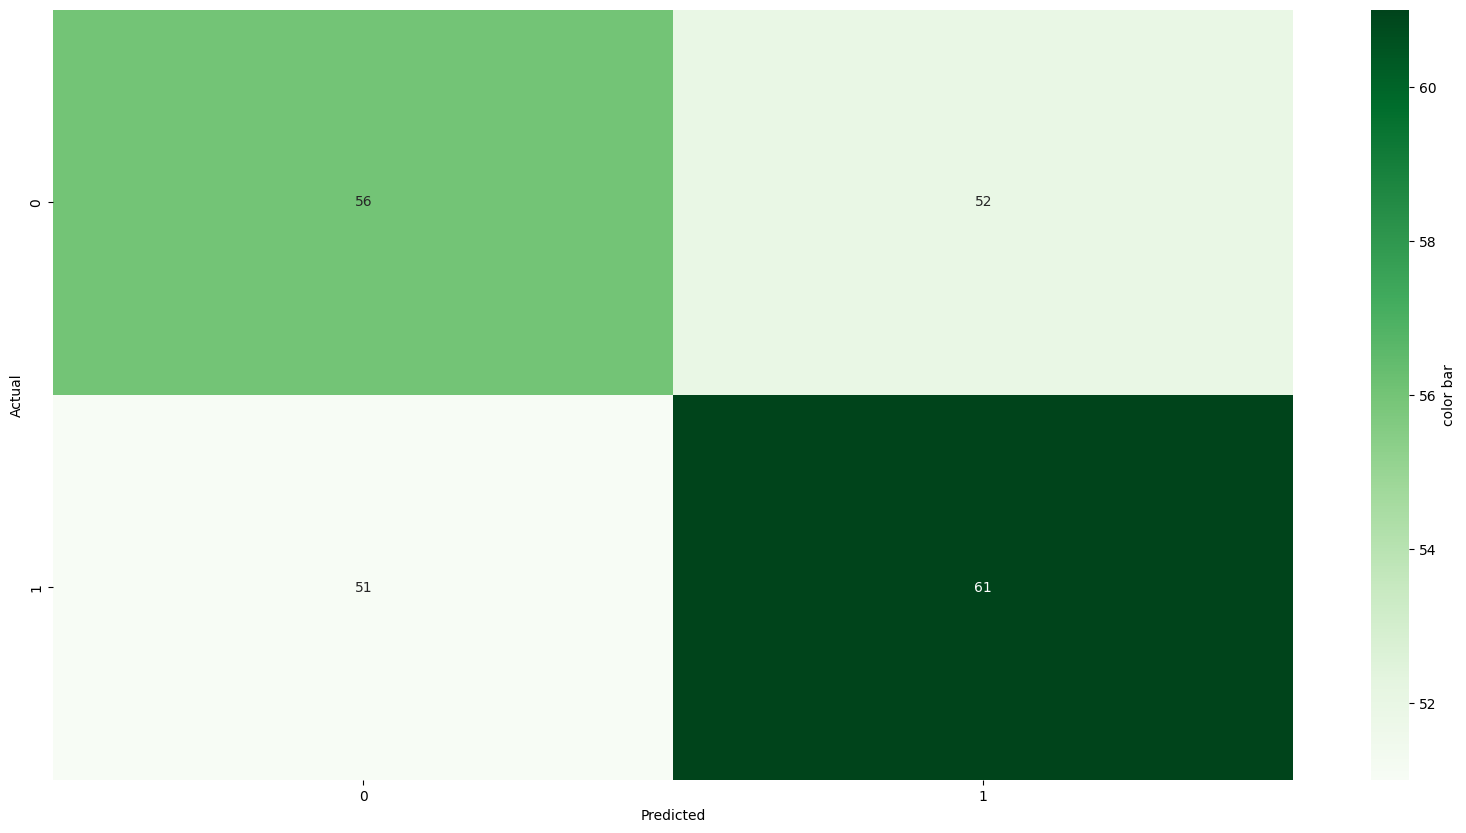

In [ ]:
sb.heatmap(cm4,cmap='Greens',annot=True,
           cbar_kws={"orientation":"vertical", "label":"color bar"},
           xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
Y_pred1 = model4.predict(X_valid)
mse = mean_squared_error(Y_valid, Y_pred1)
rmse = np.sqrt(mse)

LSTM

# **Long Short-Term Memory**

In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv("new_tesla.csv")
df.head()

,date,open,high,low,close,Adj Close,volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


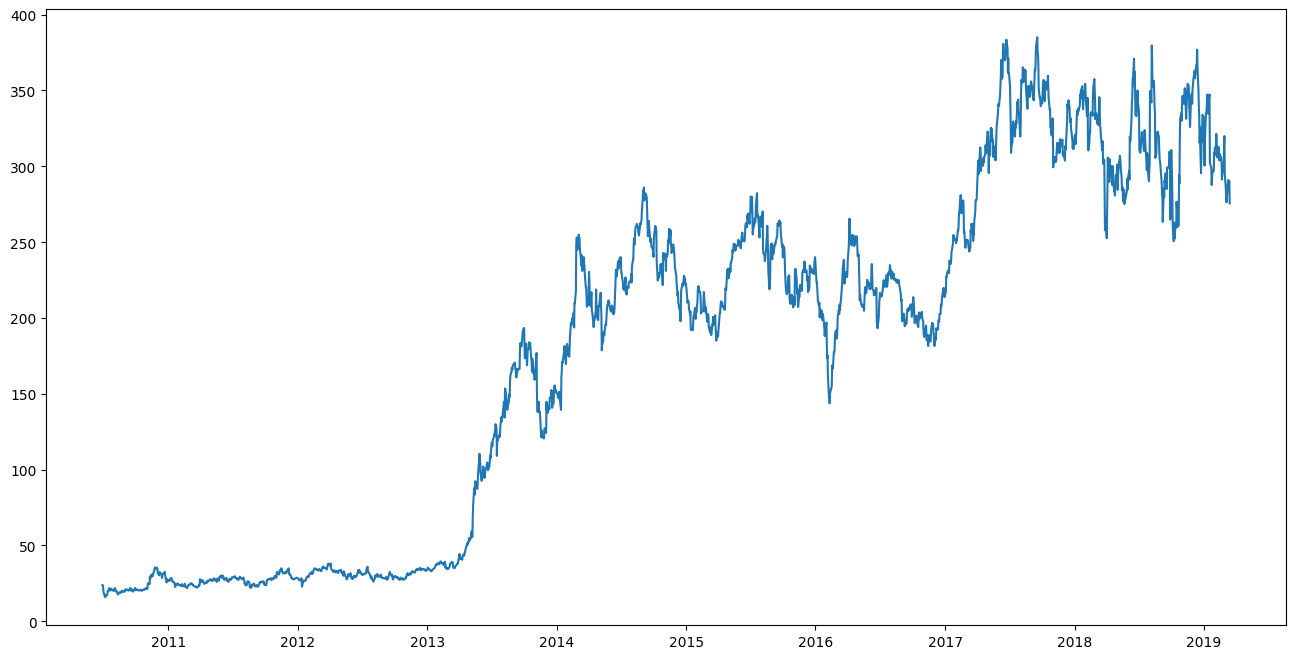

In [ ]:
df["date"] = pd.to_datetime(df.date, format="%d-%m-%Y")  # update format string to "%d-%m-%Y"
df.index = df['date']

plt.figure(figsize=(16, 8))
plt.plot(df["close"], label='Close Price history')
plt.show()

In [ ]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['date'][i]
    new_dataset["Close"][i]=data["close"][i]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
new_dataset.index = new_dataset.Date
new_dataset.drop("Date", axis=1, inplace=True)

# Scale the data
scaled_data = scaler.fit_transform(new_dataset.values)

train_data = scaled_data[:987, :]
valid_data = scaled_data[987:, :]

x_train_data, y_train_data = [], []

for i in range(60, len(train_data)):
    x_train_data.append(train_data[i-60:i, 0])
    y_train_data.append(train_data[i, 0])

# Convert data to numpy arrays and reshape for LSTM input
x_train_data = np.array(x_train_data)
y_train_data = np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))


In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

927/927 - 33s - loss: 0.0012 - 33s/epoch - 35ms/step


In [ ]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

38/38 [==============================] - 1s 19ms/step


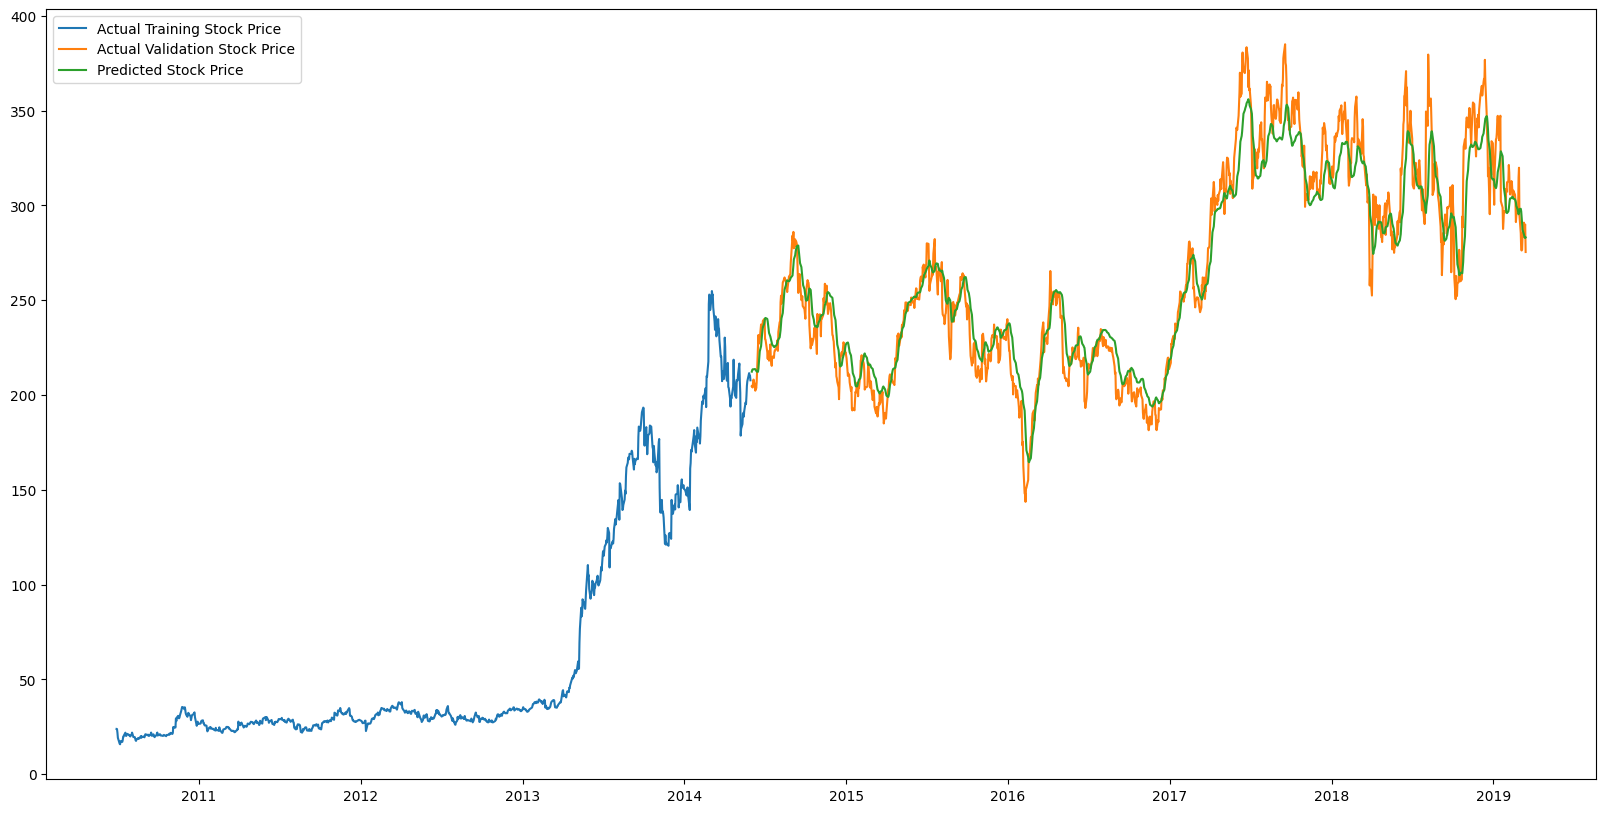

In [ ]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"], label='Actual Training Stock Price')
plt.plot(valid_data['Close'], label='Actual Validation Stock Price')
plt.plot(valid_data['Predictions'], label= 'Predicted Stock Price')
plt.legend()

In [ ]:
df.head()

,date,open,high,low,close,Adj Close,volume
date,,,,,,,
2010-06-29,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


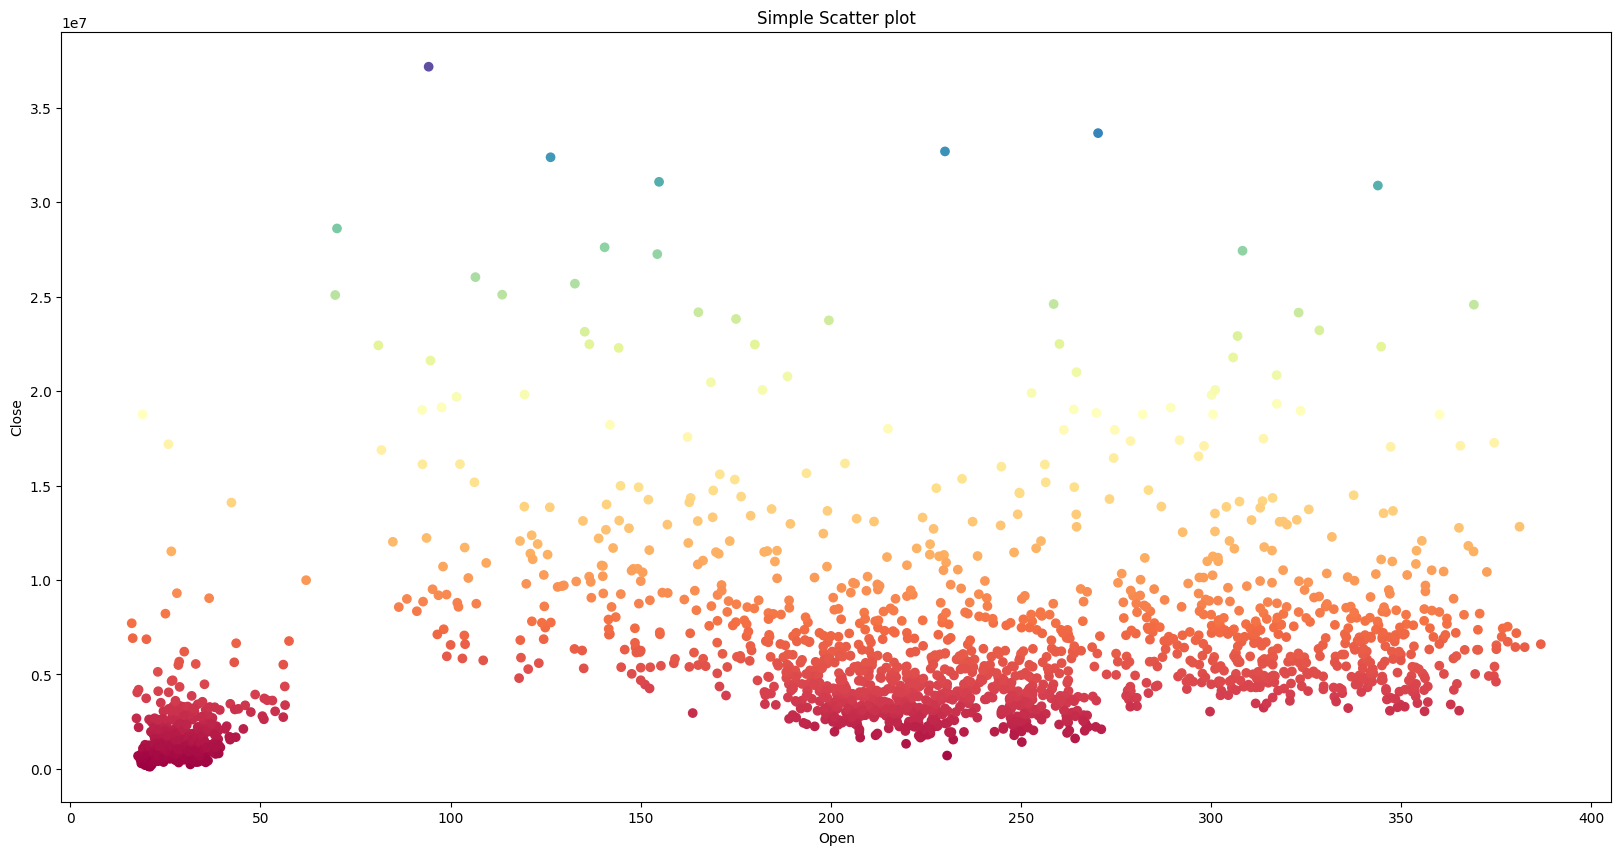

In [ ]:
x = df['open']
y = df['volume']

plt.scatter(x, y, c=y, cmap='Spectral')

plt.title('Simple Scatter plot')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()